In [70]:
import quantstats as qs
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [71]:
# Jupyter Notebook에서 보기 편하게 하기 위한 설정
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)

start_day = datetime(2012,6,1) # 시작일
end_day = datetime(2022,6,6) # 종료일

# RU : Risky Universe
# CU : Cash Universe
# BU : Benchmark Universe
RU = ['SPY','IWM','QQQ','VGK','EWJ','VWO','VNQ','GSG','GLD','TLT','HYG','LQD'] 
CU = ['SHV','IEF','UST','BND']
BU = ['^GSPC','^IXIC','^KS11','^KQ11'] # S&P500 지수, 나스닥 지수, 코스피 지수, 코스닥 지수

# Yahoo Finance에서 데이터 가져오는 함수
def get_price_data(RU, CU, BU):
    df_RCU = pd.DataFrame(columns=RU+CU)
    df_BU = pd.DataFrame(columns=BU)
    
    for ticker in RU + CU:
        df_RCU[ticker] = pdr.get_data_yahoo(ticker, start_day - timedelta(days=365), end_day)['Adj Close']  
    
    for ticker in BU:
        df_BU[ticker] = pdr.get_data_yahoo(ticker, start_day - timedelta(days=365), end_day)['Adj Close']  
     
    return df_RCU, df_BU

In [72]:
df_RCU, df_BU = get_price_data(RU, CU, BU)
df_RCU.head(5)

,SPY,IWM,QQQ,VGK,EWJ,VWO,VNQ,GSG,GLD,TLT,HYG,LQD,SHV,IEF,UST,BND
Date,,,,,,,,,,,,,,,,
2011-06-01,106.7793,70.2858,51.3627,36.4322,33.5877,36.1422,39.5633,35.6600,149.9100,74.8236,50.3560,77.6419,104.0210,80.0582,39.6198,61.0712
2011-06-02,106.6659,70.2602,51.4707,36.6785,33.6208,36.4558,39.2773,35.9600,149.5000,73.3983,50.3229,76.9390,104.0210,79.5802,39.1635,60.8249
2011-06-03,105.6052,69.2330,50.6970,36.7880,33.3227,36.2318,39.4333,36.0500,150.2200,73.8198,50.1243,77.1060,104.0210,79.8933,39.4767,60.9294
2011-06-06,104.4878,68.0945,50.2831,36.2064,32.9915,35.7464,38.8549,35.4500,150.4800,73.2604,50.0030,76.9738,104.0022,79.8439,39.4096,60.8921
2011-06-07,104.4230,68.2571,50.1931,36.5622,33.2565,36.0302,39.2643,35.7000,150.4200,73.5976,49.9644,77.2383,104.0022,79.9923,39.5527,60.9667


In [73]:
# 모멘텀 지수 계산 함수
def get_momentum(x):
    temp_list = [0 for i in range(len(x.index))]
    momentum = pd.Series(temp_list, index=x.index)

    try:
        before1 = df_RCU[x.name-timedelta(days=35):x.name-timedelta(days=30)].iloc[-1][RU+CU]
        before3 = df_RCU[x.name-timedelta(days=95):x.name-timedelta(days=90)].iloc[-1][RU+CU]        
        before6 = df_RCU[x.name-timedelta(days=185):x.name-timedelta(days=180)].iloc[-1][RU+CU]        
        before12 = df_RCU[x.name-timedelta(days=370):x.name-timedelta(days=365)].iloc[-1][RU+CU]

        momentum = 12 * (x / before1 - 1) + 4 * (x / before3 - 1) + 2 * (x / before6 - 1) + (x / before12 - 1)
    except:
        pass

    return momentum

In [74]:

# 각 자산별 모멘텀 지수 계산
mom_col_list = [col+'_M' for col in df_RCU[RU+CU].columns]
df_RCU[mom_col_list] = df_RCU[RU+CU].apply(lambda x: get_momentum(x), axis=1)
df_RCU[mom_col_list]

,SPY_M,IWM_M,QQQ_M,VGK_M,EWJ_M,VWO_M,VNQ_M,GSG_M,GLD_M,TLT_M,HYG_M,LQD_M,SHV_M,IEF_M,UST_M,BND_M
Date,,,,,,,,,,,,,,,,
2011-06-01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2011-06-02,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2011-06-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2011-06-06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2011-06-07,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.3757,-0.8114,-1.1217,-0.0886,-0.4935,-0.6358,-0.8478,2.7560,-0.5517,-1.4481,-0.1236,-0.4145,0.0031,-0.4999,-1.0302,-0.3718
2022-06-01,-0.5622,-0.9691,-1.3644,-0.2357,-0.4657,-0.6731,-0.7599,2.6612,-0.2510,-1.3140,-0.1855,-0.4784,0.0023,-0.5400,-1.1057,-0.4166
2022-06-02,-0.2363,-0.5730,-0.8418,0.3075,-0.3322,-0.3647,-0.6830,3.1593,-0.1173,-1.4442,-0.1464,-0.5536,0.0051,-0.5646,-1.1526,-0.4426


In [75]:
df_RCU = df_RCU[start_day:end_day]

# 매월 말일 데이터만 추출(리밸런싱에 사용)
df_RCU = df_RCU.resample(rule='M').last()
df_RCU.head(5)

,SPY,IWM,QQQ,VGK,EWJ,VWO,VNQ,GSG,GLD,TLT,HYG,LQD,SHV,IEF,UST,BND,SPY_M,IWM_M,QQQ_M,VGK_M,EWJ_M,VWO_M,VNQ_M,GSG_M,GLD_M,TLT_M,HYG_M,LQD_M,SHV_M,IEF_M,UST_M,BND_M
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-30,113.1039,69.4616,58.4147,30.6694,32.1262,30.5285,44.4942,30.4400,155.1900,99.0913,54.1597,85.3805,104.0182,91.0311,50.5374,65.2014,0.5887,0.6068,0.6318,0.6568,0.6962,0.2479,1.3264,-0.7489,0.1932,0.8940,0.7009,0.5162,0.0002,0.4112,0.7901,0.2377
2012-07-31,114.4418,68.4052,58.9974,30.7696,30.6923,30.5897,45.3850,32.2300,156.4900,102.8740,54.7134,88.3543,104.0182,92.3065,51.8619,66.0045,0.2757,-0.3792,0.2529,-0.3023,-1.0008,-0.5487,0.6377,0.2849,-0.1796,1.4568,0.3647,0.8589,0.0016,0.5284,1.0100,0.3629
2012-08-31,117.3088,70.8236,62.0565,32.2089,30.9313,30.6661,45.3782,34.5400,164.2200,101.5172,55.3944,88.3068,104.0371,92.1983,51.6918,66.1108,1.0077,1.2479,1.5541,1.1778,0.1511,0.0411,0.9018,1.4188,0.7708,0.2461,0.6111,0.3740,0.0046,0.1940,0.3240,0.1899
2012-09-30,120.2827,73.1331,62.6079,33.1539,31.3068,32.2946,44.5328,33.8000,171.8900,98.9459,55.6828,89.2783,104.0286,91.8772,51.4055,66.2306,0.8613,0.8422,0.6782,0.8377,-0.3832,0.9053,0.1528,0.3630,1.4853,0.2464,0.4798,0.6862,0.0023,0.2750,0.5379,0.2675
2012-10-31,118.0938,71.5467,59.3026,33.7399,30.9313,32.1166,44.1283,32.4400,166.8300,98.4670,56.1528,90.4800,104.0210,91.5133,50.8506,66.1635,0.1793,0.2150,-0.3888,0.8283,-0.1067,0.1284,0.0662,-0.5185,0.0383,-0.1057,0.4494,0.4858,-0.0001,0.0030,-0.0287,0.0722


In [76]:
# DAA 전략 기준에 맞춰 자산 선택
def select_asset(x):
    asset = pd.Series([0,0,0,0], index=['ASSET1','PRICE1','ASSET2','PRICE2'])
    momentum1 = None
    momentum2 = None
    
    # DAA 전략
    # 카나리아 자산군이 모두 0이상이면, 공격 자산 중 상위 2개 모멘텀 자산 선정
    # 'SPY','IWM','QQQ','VGK','EWJ','VWO','VNQ','GSG','GLD','TLT','HYG','LQD'
    if x['VWO_M'] > 0 and x['BND_M'] > 0:
        momentum_sort = x[['SPY_M','IWM_M','QQQ_M','VGK_M','EWJ_M','VWO_M','VNQ_M','GSG_M','GLD_M','TLT_M','HYG_M','LQD_M']].sort_values(ascending=False)
        momentum1 = momentum_sort[0]
        momentum2 = momentum_sort[1]

        asset['ASSET1'] = x[x == momentum1].index[0][:3]
        asset['PRICE1'] = x[asset['ASSET1']] 
        asset['ASSET2'] = x[x == momentum2].index[0][:3]
        asset['PRICE2'] = x[asset['ASSET2']]
    
    # 카나리아 자산군 중 하나라도 0이하라면, 방어 자산 중 최고 모멘텀 자산 선정
    # 'SHV','IEF','UST'
    else :
        momentum1 = max(x['SHV_M'],x['IEF_M'],x['UST_M'])
        
        asset['ASSET1'] = x[x == momentum1].index[0][:3]
        asset['PRICE1'] = x[asset['ASSET1']] 
        asset['ASSET2'] = x[x == momentum1].index[0][:3]
        asset['PRICE2'] = x[asset['ASSET2']]        
    
    return asset

In [77]:
# 매월 선택할 자산과 가격
df_RCU[['ASSET1','PRICE1','ASSET2','PRICE2']] = df_RCU.apply(lambda x: select_asset(x), axis=1)
df_RCU[['ASSET1','PRICE1','ASSET2','PRICE2']].tail(5)

,ASSET1,PRICE1,ASSET2,PRICE2
Date,,,,
2022-02-28,SHV,110.1820,SHV,110.1820
2022-03-31,SHV,110.1420,SHV,110.1420
2022-04-30,SHV,110.1100,SHV,110.1100
2022-05-31,SHV,110.1830,SHV,110.1830
2022-06-30,SHV,110.1700,SHV,110.1700


In [78]:
# 각 자산별 수익률 계산
profit_col_list = [col+'_P' for col in df_RCU[RU+CU].columns]
df_RCU[profit_col_list] = df_RCU[RU+CU].pct_change()
df_RCU[profit_col_list].tail(5)

,SPY_P,IWM_P,QQQ_P,VGK_P,EWJ_P,VWO_P,VNQ_P,GSG_P,GLD_P,TLT_P,HYG_P,LQD_P,SHV_P,IEF_P,UST_P,BND_P
Date,,,,,,,,,,,,,,,,
2022-02-28,-0.0295,0.0103,-0.0448,-0.0529,-0.0178,-0.0372,-0.0348,0.0884,0.0612,-0.0163,-0.0086,-0.0213,-0.0004,-0.0030,-0.0089,-0.0114
2022-03-31,0.0376,0.0116,0.0467,0.0016,-0.0211,-0.0326,0.0626,0.0884,0.0127,-0.0544,-0.0129,-0.0289,-0.0004,-0.0406,-0.0834,-0.0275
2022-04-30,-0.0878,-0.0990,-0.1360,-0.0625,-0.0810,-0.0583,-0.0409,0.0455,-0.0207,-0.0942,-0.0418,-0.0670,-0.0003,-0.0423,-0.0815,-0.0397
2022-05-31,0.0023,0.0019,-0.0159,0.0241,0.0173,0.0046,-0.0469,0.0574,-0.0326,-0.0225,0.0163,0.0186,0.0007,0.0062,0.0110,0.0083
2022-06-30,-0.0028,0.0138,-0.0034,-0.0010,-0.0049,0.0009,-0.0112,0.0359,0.0040,-0.0212,-0.0144,-0.0156,-0.0001,-0.0136,-0.0271,-0.0109


In [79]:
# 매월 수익률 & 누적 수익률 계산
df_RCU['PROFIT'] = 0
df_RCU['PROFIT_ACC'] = 0
df_RCU['LOG_PROFIT'] = 0
df_RCU['LOG_PROFIT_ACC'] = 0

for i in range(len(df_RCU)):
    profit = 0
    log_profit = 0
        
    if i != 0:
        profit = (df_RCU[df_RCU.iloc[i-1]['ASSET1'] + '_P'].iloc[i] + df_RCU[df_RCU.iloc[i-1]['ASSET2'] + '_P'].iloc[i]) / 2
        log_profit = math.log(profit+1)
    
    df_RCU.loc[df_RCU.index[i], 'PROFIT'] = profit
    df_RCU.loc[df_RCU.index[i], 'PROFIT_ACC'] = (1+df_RCU.loc[df_RCU.index[i-1], 'PROFIT_ACC'])*(1+profit)-1
    df_RCU.loc[df_RCU.index[i], 'LOG_PROFIT'] = log_profit
    df_RCU.loc[df_RCU.index[i], 'LOG_PROFIT_ACC'] = df_RCU.loc[df_RCU.index[i-1], 'LOG_PROFIT_ACC'] + log_profit
    
# 수익률에 100을 곱해서 백분율로 표기   
df_RCU[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] = df_RCU[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] * 100
df_RCU[profit_col_list] = df_RCU[profit_col_list] * 100    

df_RCU[['PROFIT','PROFIT_ACC','LOG_PROFIT','LOG_PROFIT_ACC']].tail(10)

,PROFIT,PROFIT_ACC,LOG_PROFIT,LOG_PROFIT_ACC
Date,,,,
2021-09-30,-5.6823,103.7757,-5.8501,71.1849
2021-10-31,-0.0272,103.7203,-0.0272,71.1578
2021-11-30,-0.0453,103.6281,-0.0453,71.1125
2021-12-31,-1.8263,99.9091,-1.8432,69.2693
2022-01-31,-0.0815,99.7462,-0.0815,69.1877
2022-02-28,-0.0363,99.6738,-0.0363,69.1515
2022-03-31,-0.0363,99.6014,-0.0363,69.1152
2022-04-30,-0.0290,99.5434,-0.0290,69.0862
2022-05-31,0.0663,99.6757,0.0662,69.1524


In [80]:
df_RCU[['PROFIT']].tail(10)
pd.set_option('display.max_rows', 110)
display(df_RCU[['PROFIT']])

,PROFIT
Date,
2012-06-30,0.0000
2012-07-31,2.9097
2012-08-31,-0.3279
2012-09-30,-0.6270
2012-10-31,-1.7475
...,...
2022-02-28,-0.0363
2022-03-31,-0.0363
2022-04-30,-0.0290


In [81]:
aaa = df_RCU[['PROFIT']].squeeze()
r = (aaa+100)/100
r.cumprod()

Date
2012-06-30   1.0000
2012-07-31   1.0291
2012-08-31   1.0257
2012-09-30   1.0193
2012-10-31   1.0015
              ...  
2022-02-28   1.9967
2022-03-31   1.9960
2022-04-30   1.9954
2022-05-31   1.9968
2022-06-30   1.9965
Freq: M, Name: PROFIT, Length: 121, dtype: float64

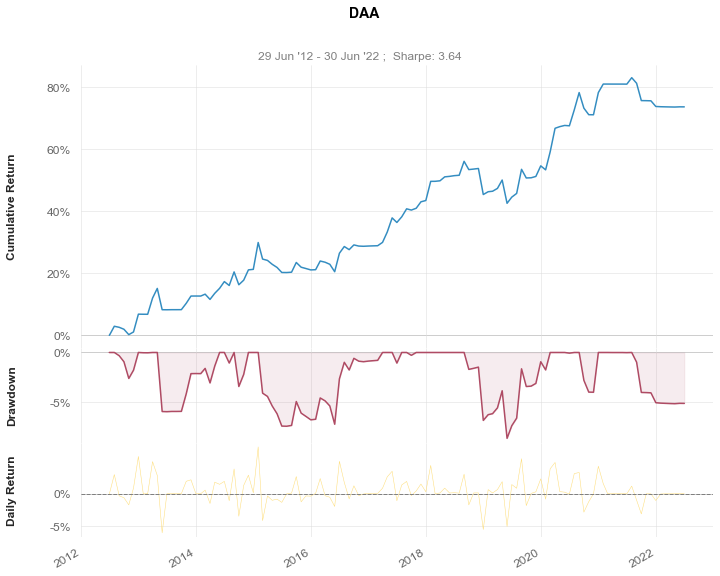

In [82]:
qs.plots.snapshot(r.cumprod(), mode="basic", title="DAA")

ValueError: cannot convert float NaN to integer

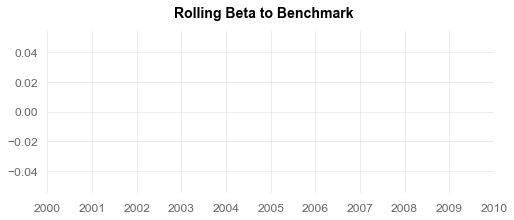

In [83]:
qs.reports.html(r.cumprod(), 'DAA', output="./DAA.html")

In [ ]:
stock = qs.utils.download_returns('FB')
stock

Date
2012-05-18       NaN
2012-05-21   -0.1099
2012-05-22   -0.0890
2012-05-23    0.0323
2012-05-24    0.0322
               ...  
2022-06-03   -0.0406
2022-06-06    0.0182
2022-06-07    0.0072
2022-06-08    0.0051
2022-06-09   -0.0643
Name: Close, Length: 2532, dtype: float64

In [ ]:
qs.reports.metrics(stock, mode='basic')

                    Strategy
------------------  ----------
Start Period        2012-05-18
End Period          2022-06-09
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   381.27%
CAGR﹪              16.89%

Sharpe              0.6
Prob. Sharpe Ratio  96.96%
Sortino             0.88
Sortino/√2          0.62
Omega               1.12

Max Drawdown        -54.22%
Longest DD Days     532

Gain/Pain Ratio     0.12
Gain/Pain (1M)      0.68

Payoff Ratio        1.02
Profit Factor       1.12
Common Sense Ratio  1.13
CPC Index           0.6
Tail Ratio          1.0
Outlier Win Ratio   3.9
Outlier Loss Ratio  4.0

MTD                 -4.98%
3M                  -3.31%
6M                  -44.34%
YTD                 -45.3%
1Y                  -44.86%
3Y (ann.)           -2.1%
5Y (ann.)           4.04%
10Y (ann.)          21.11%
All-time (ann.)     16.89%

Avg. Drawdown       -5.37%
Avg. Drawdown Days  30
Recovery Factor     7.03
Ulcer Index         0.18
Serenity Index      1.5

In [ ]:
qs.reports.html(stock, "FB", output='./FB.html')